In [1]:
%load_ext autoreload

%autoreload 2

In [2]:
import os 

if "notebooks" in os.getcwd():
    os.chdir("..")

import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

from src.make_dataset.preprocessing import Preprocessing

## Exploratory data analysis

Goals of this notebook:

* Getting familiar with the data
* Understanding how big is our data
* Studying features and target correlation

In [3]:
X_train = pd.read_csv("data/X_train_G3tdtEn.csv")
y_train = pd.read_csv("data/Y_train_2_XPXJDyy.csv")

C:\Users\User\AppData\Local\Temp\ipykernel_7064\382096826.py:1: DtypeWarning: Columns (21,22,23,24,69,70,71,72,93,94,95,96,97,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120) have mixed types. Specify dtype option on import or set low_memory=False.
  X_train = pd.read_csv("data/X_train_G3tdtEn.csv")


In [4]:
X_train

,ID,item1,item2,item3,item4,item5,item6,item7,item8,item9,...,Nbr_of_prod_purchas16,Nbr_of_prod_purchas17,Nbr_of_prod_purchas18,Nbr_of_prod_purchas19,Nbr_of_prod_purchas20,Nbr_of_prod_purchas21,Nbr_of_prod_purchas22,Nbr_of_prod_purchas23,Nbr_of_prod_purchas24,Nb_of_items
0,85517,COMPUTERS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,51113,COMPUTER PERIPHERALS ACCESSORIES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,83008,TELEVISIONS HOME CINEMA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,78712,COMPUTERS,COMPUTER PERIPHERALS ACCESSORIES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
4,77846,TELEVISIONS HOME CINEMA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92785,21243,COMPUTER PERIPHERALS ACCESSORIES,FULFILMENT CHARGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
92786,45891,COMPUTERS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
92787,42613,BEDROOM FURNITURE,BEDROOM FURNITURE,OUTDOOR FURNITURE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
92788,43567,COMPUTERS,COMPUTERS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0


In [5]:
X_train.isna()\
    .sum(axis = 1)

0        138
1        138
2        138
3        132
4        138
        ... 
92785    132
92786    138
92787    126
92788    132
92789    138
Length: 92790, dtype: int64

<AxesSubplot:>

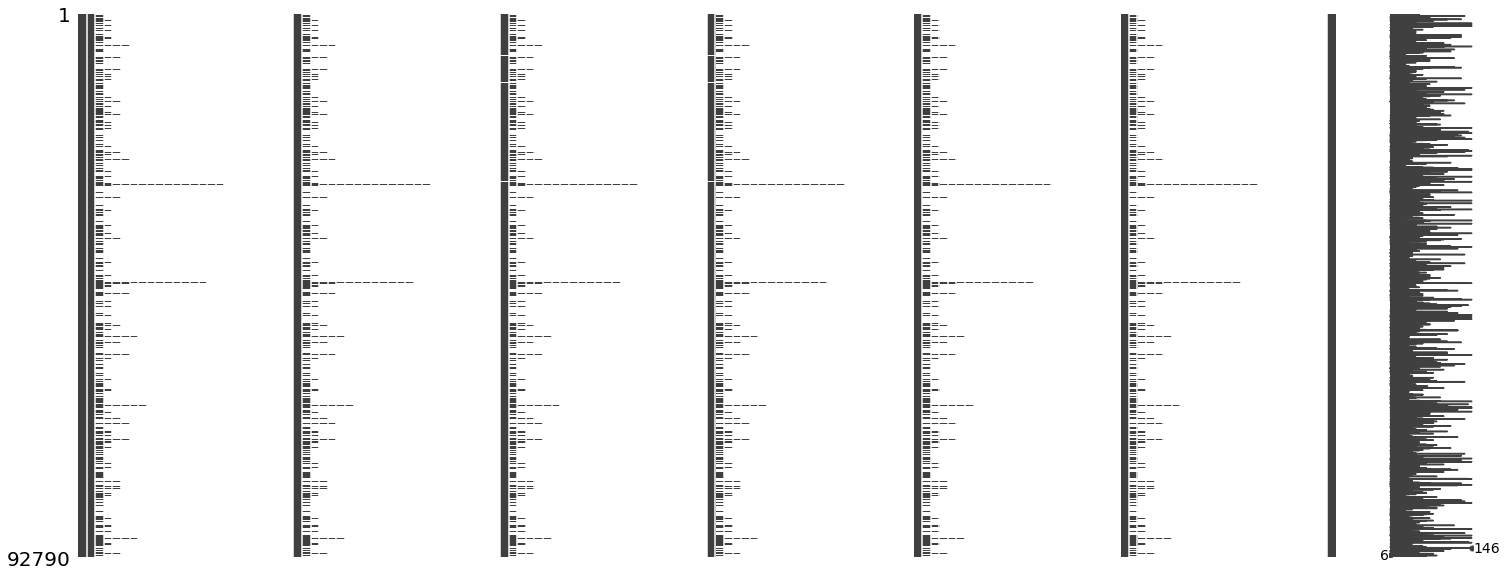

In [6]:
msno.matrix(X_train)


In [7]:
X_train.dtypes

ID                         int64
item1                     object
item2                     object
item3                     object
item4                     object
                          ...   
Nbr_of_prod_purchas21    float64
Nbr_of_prod_purchas22    float64
Nbr_of_prod_purchas23    float64
Nbr_of_prod_purchas24    float64
Nb_of_items              float64
Length: 146, dtype: object

In [8]:
X_train["Nb_of_items"]\
    .value_counts()

1.0     48134
2.0     31755
3.0      8339
4.0      2392
5.0       834
6.0       390
7.0       219
8.0       159
9.0        96
10.0       88
12.0       65
11.0       62
13.0       38
15.0       28
14.0       26
16.0       23
17.0       22
18.0       17
20.0       14
21.0       14
22.0       13
19.0       12
23.0        7
24.0        5
31.0        5
26.0        4
29.0        4
30.0        3
35.0        3
34.0        3
38.0        3
28.0        2
39.0        2
40.0        2
48.0        1
41.0        1
25.0        1
27.0        1
44.0        1
36.0        1
60.0        1
Name: Nb_of_items, dtype: int64

## Correlation beetween numerical features

<AxesSubplot:>

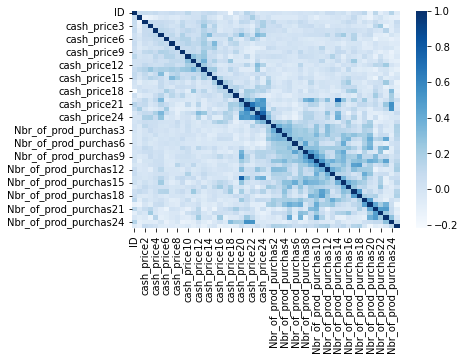

In [9]:
features_corr_df = X_train.corr()
sns.heatmap(features_corr_df, cmap="Blues", )

Text(0.5, 1.0, 'correlation beetween numerical features and target')

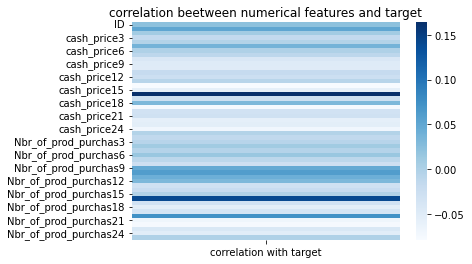

In [10]:
features_target_corr = X_train.corrwith(y_train["fraud_flag"])
sns.heatmap(
    pd.DataFrame(
        features_target_corr\
            .rename("correlation with target"),
    ), 
    cmap= "Blues"
)

plt.title("correlation beetween numerical features and target")

In [11]:
features_target_corr.sort_values()

cash_price14            -0.079014
cash_price19            -0.075942
Nbr_of_prod_purchas22   -0.075308
cash_price24            -0.069733
Nbr_of_prod_purchas21   -0.068634
cash_price15            -0.057495
cash_price22            -0.056729
Nbr_of_prod_purchas18   -0.053985
cash_price23            -0.053433
Nbr_of_prod_purchas24   -0.052187
cash_price10            -0.048929
cash_price9             -0.048341
Nbr_of_prod_purchas23   -0.042126
cash_price8             -0.041936
Nbr_of_prod_purchas19   -0.036693
cash_price20            -0.031936
Nbr_of_prod_purchas17   -0.031690
Nbr_of_prod_purchas13   -0.029601
cash_price21            -0.029058
cash_price17            -0.027515
Nbr_of_prod_purchas8    -0.026277
cash_price12            -0.025266
Nbr_of_prod_purchas14   -0.020836
cash_price11            -0.017631
cash_price3             -0.015652
Nbr_of_prod_purchas2    -0.013777
cash_price7             -0.011319
Nbr_of_prod_purchas7    -0.010488
cash_price13            -0.007425
Nbr_of_prod_pu

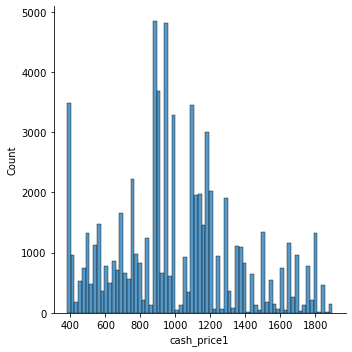

In [13]:
sns.displot(
    Preprocessing.remove_outliers(
        X_train.cash_price1
    )
)

We can conclude that numerical data is not correlated neither with target and with itself

## Analysing non numerical variables

In [14]:
fraud_idx = y_train.query("fraud_flag == 1")\
    .index

In [41]:
X_train.loc[fraud_idx]\
    .item1\
    .value_counts()

COMPUTERS                                    1066
TELEPHONES, FAX MACHINES & TWO-WAY RADIOS      86
TELEVISIONS HOME CINEMA                        49
COMPUTER PERIPHERALS ACCESSORIES               36
TELEPHONES FAX MACHINES TWO-WAY RADIOS         31
BABY CHILD TRAVEL                              10
AUDIO ACCESSORIES                               6
IMAGING EQUIPMENT                               5
COMPUTER PERIPHERALS & ACCESSORIES              4
OUTDOOR FURNITURE                               3
LIGHTING                                        2
WOMEN S CLOTHES                                 2
SOFT FURNISHINGS                                2
BABY CHANGING                                   2
HOME AND PERSONAL SECURITY                      2
FOOD PREPARATION                                1
CABLES ADAPTERS                                 1
TABLEWARE                                       1
BEDROOM FURNITURE                               1
TELEVISIONS & HOME CINEMA                       1


In [32]:
items_df = Preprocessing.get_columns_with(X_train, "item")

In [37]:
items_df

,item1,item2,item3,item4,item5,item6,item7,item8,item9,item10,...,item16,item17,item18,item19,item20,item21,item22,item23,item24,Nb_of_items
0,COMPUTERS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,COMPUTER PERIPHERALS ACCESSORIES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,TELEVISIONS HOME CINEMA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,COMPUTERS,COMPUTER PERIPHERALS ACCESSORIES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
4,TELEVISIONS HOME CINEMA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92785,COMPUTER PERIPHERALS ACCESSORIES,FULFILMENT CHARGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
92786,COMPUTERS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
92787,BEDROOM FURNITURE,BEDROOM FURNITURE,OUTDOOR FURNITURE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
92788,COMPUTERS,COMPUTERS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0


In [36]:
items_df.item1\
    .str\
    .contains("COMPUTER")\
    .sum()

61427

## Analysing the first items

In [53]:
first_items = Preprocessing.get_columns_with(X_train,"1", method= "endswith")

In [63]:
first_items.head()

,item1,item11,item21,cash_price1,cash_price11,cash_price21,make1,make11,make21,model1,model11,model21,goods_code1,goods_code11,goods_code21,Nbr_of_prod_purchas1,Nbr_of_prod_purchas11,Nbr_of_prod_purchas21
0,COMPUTERS,NaN,NaN,889.0,NaN,NaN,APPLE,NaN,NaN,2020 APPLE MACBOOK AIR 13 3 RETINA DISPLAY M1 ...,NaN,NaN,239246776,NaN,NaN,1.0,NaN,NaN
1,COMPUTER PERIPHERALS ACCESSORIES,NaN,NaN,409.0,NaN,NaN,APPLE,NaN,NaN,APPLE WATCH SERIES 6 GPS 44MM SPACE GREY ALUMI...,NaN,NaN,239001518,NaN,NaN,1.0,NaN,NaN
2,TELEVISIONS HOME CINEMA,NaN,NaN,1399.0,NaN,NaN,SAMSUNG,NaN,NaN,SAMSUNG QE75Q70A 2021 QLED HDR 4K ULTRA HD SMA...,NaN,NaN,239842093,NaN,NaN,1.0,NaN,NaN
3,COMPUTERS,NaN,NaN,689.0,NaN,NaN,APPLE,NaN,NaN,2020 APPLE IPAD AIR 10 9 A14 BIONIC PROCESSOR IOS,NaN,NaN,239001422,NaN,NaN,1.0,NaN,NaN
4,TELEVISIONS HOME CINEMA,NaN,NaN,1199.0,NaN,NaN,SONY,NaN,NaN,SONY BRAVIA KE48A9 2020 OLED HDR 4K ULTRA HD S...,NaN,NaN,239952954,NaN,NaN,1.0,NaN,NaN


In [65]:
first_items.loc[fraud_idx]\
    .head()

,item1,item11,item21,cash_price1,cash_price11,cash_price21,make1,make11,make21,model1,model11,model21,goods_code1,goods_code11,goods_code21,Nbr_of_prod_purchas1,Nbr_of_prod_purchas11,Nbr_of_prod_purchas21
110,COMPUTER PERIPHERALS & ACCESSORIES,NaN,NaN,749.0,NaN,NaN,APPLE,NaN,NaN,APPLE WATCH SERIES 6,NaN,NaN,239001450,NaN,NaN,1.0,NaN,NaN
134,COMPUTERS,NaN,NaN,1449.0,NaN,NaN,APPLE,NaN,NaN,2021 APPLE IPAD PRO 12 9 M1 PROCESSOR IOS WI-F...,NaN,NaN,240040997,NaN,NaN,1.0,NaN,NaN
165,COMPUTERS,NaN,NaN,999.0,NaN,NaN,APPLE,NaN,NaN,2021 APPLE IPAD PRO 11 M1 PROCESSOR IOS WI-FI ...,NaN,NaN,240041014,NaN,NaN,1.0,NaN,NaN
225,"TELEPHONES, FAX MACHINES & TWO-WAY RADIOS",NaN,NaN,774.0,NaN,NaN,APPLE,NaN,NaN,APPLE IPHONE 12,NaN,NaN,239091995,NaN,NaN,1.0,NaN,NaN
278,COMPUTERS,NaN,NaN,937.0,NaN,NaN,APPLE,NaN,NaN,2020 APPLE MACBOOK AIR,NaN,NaN,239246778,NaN,NaN,1.0,NaN,NaN


In [59]:
first_items.loc[fraud_idx]\
    .make1\
    .value_counts()

APPLE              1186
SAMSUNG              62
LG                   18
SONY                  7
RETAILER              5
SILVER CROSS          5
PANASONIC             5
BUGABOO               3
KETTLER               2
PHILIPS               2
LEVI S                2
TOMMEE TIPPEE         1
RALPH LAUREN          1
MAXI-COSI             1
CYBEX                 1
NIKON                 1
GAIA BABY             1
BT                    1
HALO                  1
TEMPUR                1
SHNUGGLE              1
MORPHY RICHARDS       1
RING                  1
LE CREUSET            1
KARTELL               1
DELL                  1
Name: make1, dtype: int64

We thus can conclude that most of the frauds happens with Apple products. ```make1``` shows to be an important feature

In [62]:
first_items\
    .make1\
    .value_counts()

APPLE       63868
LG           8113
RETAILER     6037
SAMSUNG      4698
SONY         2973
            ...  
TATAY           1
TOM FORD        1
THOUGHT         1
REISS           1
PEONY           1
Name: make1, Length: 425, dtype: int64

## Verifying price of products

In [86]:
X_train.loc[fraud_idx]\
    [["cash_price1", "make1", "item1"]]\
    .describe()

,cash_price1
count,1319.000000
mean,1400.983321
std,742.289274
min,8.000000
25%,949.000000
50%,1199.000000
75%,1785.000000
max,6999.000000


In [85]:
X_train.query("make1 == 'APPLE'")\

count    63868.000000
mean       990.239400
std        562.899164
min          7.000000
25%        556.000000
50%        899.000000
75%       1187.000000
max       6136.000000
Name: cash_price1, dtype: float64